In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

## Create a basic time dependent wave function


Take the parameters and return:

$$\psi(x,t) = Ae^{-i(kx-\omega t)}$$

In [2]:
def psi(x,t,A=1,w=100,k=np.sqrt(100)):
    
    return A*np.exp(-(1j)*((k*x-w*t)))

## Return one contribution and plot

Here $A=1$, $\omega=100$ and $k=\sqrt{\omega}$, which is consistent for $m = \hbar = 1$. We only plot the real part.

Text(0, 0.5, 'phi')

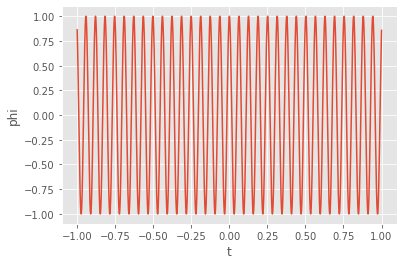

In [3]:
x = 0
t = np.arange(-1,1,0.0001)

psi1 = psi(x,t)

plt.plot(t,np.real(psi1))
plt.xlabel('t')
plt.ylabel('phi')

## Add two more components

We add two contributions, one 5 Hz above and one 5 Hz below with about 1/3 the amplitude. Now, you see how the packet starts to take shape from constributive and destructive interference.

Text(0, 0.5, 'phi')

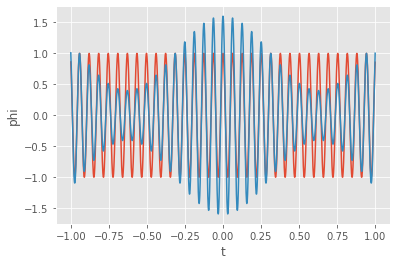

In [4]:
x = 0
t = np.arange(-1,1,0.0001)

psi1 = psi(x,t)
psi2 = psi(x,t,A=0.3,w=105,k=np.sqrt(105))
psi3 = psi(x,t,A=0.3,w=95,k=np.sqrt(95))

psi_tot = psi1 + psi2 + psi3

plt.plot(t,np.real(psi1))
plt.plot(t,np.real(psi_tot))
plt.xlabel('t')
plt.ylabel('phi')

## Continue adding more components

We add 4 more contributions, at 5 Hz intervals above and below 100 Hz and we modify the amplitudes to be a factor of ten lower each time.

Text(0, 0.5, 'phi')

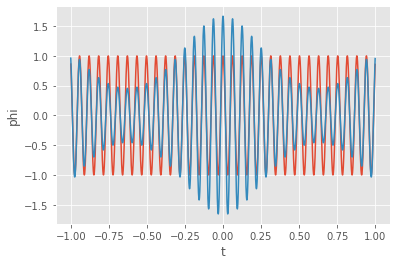

In [5]:
x = 0
t = np.arange(-1,1,0.0001)

psi1 = psi(x,t)
psi2 = psi(x,t,A=0.3,w=105,k=np.sqrt(105))
psi3 = psi(x,t,A=0.3,w=95,k=np.sqrt(95))
psi4 = psi(x,t,A=0.03,w=110,k=np.sqrt(110))
psi5 = psi(x,t,A=0.03,w=90,k=np.sqrt(90))
psi6 = psi(x,t,A=0.003,w=115,k=np.sqrt(115))
psi7 = psi(x,t,A=0.003,w=85,k=np.sqrt(85))

psi_tot = psi1 + psi2 + psi3 + psi4 + psi5 + psi6 + psi7

plt.plot(t,np.real(psi1))
plt.plot(t,np.real(psi_tot))
plt.xlabel('t')
plt.ylabel('phi')

## Automate a bit

We can automate this a bit by using a for loop that adds or subtracts $d\omega$ to each contribution and modifies the amplitude for each contribution. Now, we see the localization beginning to show.

Text(0, 0.5, 'phi')

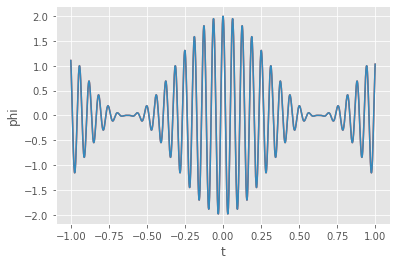

In [6]:
x = 0
t = np.arange(-1, 1, 0.001)

A = 1
omega = 100
k=np.sqrt(omega)

psi1 = 0
psi_tot = 0

psi1 = psi(x,t)
psi_tot = psi1

n = 20
scale = 0.333
domega = 5

for i in range(n):
    
    omega_plus = omega + domega
    omega_minus = omega - domega
    
    k_plus = np.sqrt(omega_plus)
    k_minus = np.sqrt(omega_minus)
    
    A = A*scale
    
    psi_tot += (psi(x,t,A=A,w=omega_plus, k=k_plus) + psi(x,t,A=A,w=omega_minus, k=k_minus))
    

plt.plot(t,np.real(psi1))
plt.plot(t,np.real(psi_tot))
plt.xlabel('t')
plt.ylabel('phi')

## What about the imaginary part?

Turns out it looks basically the same with a phase shift, so for this we can qualitatively reason about either in the same way. Neither is observable.

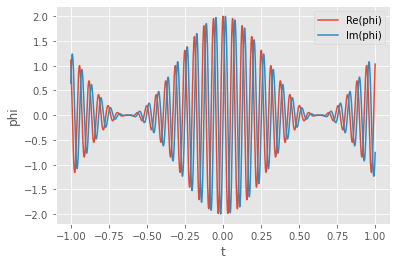

In [7]:
plt.plot(t,np.real(psi_tot))
plt.plot(t,np.imag(psi_tot))
plt.xlabel('t')
plt.ylabel('phi')
plt.legend(['Re(phi)', 'Im(phi)'])

## Observables

We know we can find the observables by operating on the wavefunction with appropriate operators. The simplest case is just the probability distribution $P(x,t) = |\psi(x,t)|^2$. Here we have set $x=0$ and just look at $P(0,t)$.

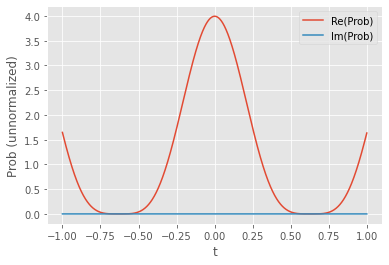

In [8]:
prob = np.conj(psi_tot.T)*psi_tot
plt.plot(t,np.real(prob))
plt.plot(t,np.imag(prob))
plt.xlabel('t')
plt.ylabel('Prob (unnormalized)')
plt.legend(['Re(Prob)', 'Im(Prob)'])